In [ ]:
%cd "/content/drive/MyDrive/Sentiment Analysis of Code-Mixed Telugu-English Text using Sequence models. (SACMTET)/data normalization"

/content/drive/MyDrive/Sentiment Analysis of Code-Mixed Telugu-English Text using Sequence models. (SACMTET)/data normalization


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(tf.__version__)
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
tf.random.set_seed(0)

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Dropout, SimpleRNN
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import GRU, LSTM, Bidirectional
from tensorflow.keras.layers import Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from sklearn import metrics

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
2.8.0


In [ ]:
vocab_size = 5000
embedding_dim = 300
max_len = 25

batch_size=128
epochs=20

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>", lower=True)
binarizer = LabelBinarizer()

In [ ]:
def simple_rnn():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(SimpleRNN(512, return_sequences=True))
    model.add(SimpleRNN(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def gru():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(GRU(512, return_sequences=True))
    model.add(GRU(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(LSTM(512, return_sequences=True))
    model.add(LSTM(256))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

def bi_lstm():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Bidirectional(LSTM(512, return_sequences=True)))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model
    
def conv1d():
    model=Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
    model.add(Conv1D(filters=128, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=64, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Conv1D(filters=32, kernel_size=4, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.0001), metrics='accuracy')
    return model

# Plot history:
def plot_history(history):
    plt.figure()
    plt.plot(history.history['loss'], label='training data')
    plt.plot(history.history['val_loss'], label='validation data')
    plt.title('LOSS')
    plt.ylabel('Loss')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")

    # Plot history: Acc
    plt.figure()
    plt.plot(history.history['accuracy'], label='training data')
    plt.plot(history.history['val_accuracy'], label='validation data')
    plt.title('ACCURACY')
    plt.ylabel('Accuracy')
    plt.xlabel('No. epoch')
    plt.legend(loc="upper left")
    plt.show()


def evaluate_model(trained_model, y_test_true):
    y_test_preds = trained_model.predict(x_test)
    y_test_preds = np.argmax(y_test_preds, axis=1)

    print(metrics.classification_report(y_test_true, y_test_preds))

    cm = metrics.confusion_matrix(y_test_true, y_test_preds, normalize='true')
    sns.heatmap(cm, annot=True, cbar=None, cmap='viridis')
    plt.show()
    f1 = metrics.f1_score(y_test_true, y_test_preds, average='macro')
    return f1


In [ ]:
data = pd.read_csv('normalized_data.csv')
data.label = data.label.map({'NEG':0, 'POS':1,'NTL':2})

stop_words = set(stopwords.words('english'))
black_list = set(word for word in stop_words if 'no' in word or "'t" in word)
stop_words = stop_words - black_list

data.comment = data.comment.apply(lambda x: ' '.join([word for word in x.lower().split() if word not in stop_words]))

labels = data.label.tolist()
sentences = data.comment.tolist()

_ = tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
padded_sequences = pad_sequences(sequences, padding='post', maxlen=max_len)

x_train, x_test, y_train, y_test = train_test_split(
    padded_sequences, labels, stratify=labels, test_size=0.2, random_state=101)

y_train_true = y_train.copy()
y_test_true = y_test.copy()

y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

Epoch 1/20
125/125 [==============================] - 19s 113ms/step - loss: 0.8259 - accuracy: 0.6192 - val_loss: 0.6673 - val_accuracy: 0.7096
Epoch 2/20
125/125 [==============================] - 13s 101ms/step - loss: 0.5523 - accuracy: 0.7727 - val_loss: 0.6916 - val_accuracy: 0.7174
Epoch 3/20
125/125 [==============================] - 7s 56ms/step - loss: 0.4574 - accuracy: 0.8186 - val_loss: 0.6303 - val_accuracy: 0.7421
Epoch 4/20
125/125 [==============================] - 7s 56ms/step - loss: 0.3794 - accuracy: 0.8553 - val_loss: 0.6426 - val_accuracy: 0.7375
Epoch 5/20
125/125 [==============================] - 8s 66ms/step - loss: 0.3083 - accuracy: 0.8830 - val_loss: 0.7053 - val_accuracy: 0.7411
Epoch 6/20
125/125 [==============================] - 7s 56ms/step - loss: 0.2421 - accuracy: 0.9102 - val_loss: 0.8437 - val_accuracy: 0.7335


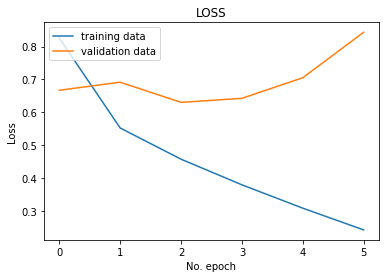

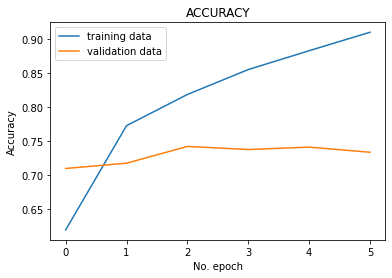

              precision    recall  f1-score   support

           0       0.81      0.78      0.79      1544
           1       0.73      0.78      0.75      1586
           2       0.61      0.55      0.57       844

    accuracy                           0.73      3974
   macro avg       0.71      0.70      0.71      3974
weighted avg       0.73      0.73      0.73      3974



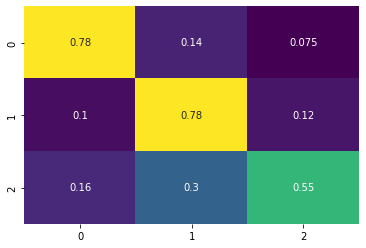

f1 score 0.7079243979022093


In [ ]:
# RNN
rnn_model = simple_rnn()
#checkpoint_path="simple_rnn_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      #ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = rnn_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(rnn_model, y_test_true)
print("f1 score", f1)

Epoch 1/20
125/125 [==============================] - 9s 25ms/step - loss: 0.9917 - accuracy: 0.4867 - val_loss: 0.9016 - val_accuracy: 0.5468
Epoch 2/20
125/125 [==============================] - 2s 19ms/step - loss: 0.7770 - accuracy: 0.6448 - val_loss: 0.7411 - val_accuracy: 0.6550
Epoch 3/20
125/125 [==============================] - 2s 19ms/step - loss: 0.6612 - accuracy: 0.7147 - val_loss: 0.7346 - val_accuracy: 0.6686
Epoch 4/20
125/125 [==============================] - 2s 19ms/step - loss: 0.5984 - accuracy: 0.7418 - val_loss: 0.6657 - val_accuracy: 0.7046
Epoch 5/20
125/125 [==============================] - 2s 18ms/step - loss: 0.5215 - accuracy: 0.7764 - val_loss: 0.5898 - val_accuracy: 0.7401
Epoch 6/20
125/125 [==============================] - 2s 19ms/step - loss: 0.4329 - accuracy: 0.8158 - val_loss: 0.5905 - val_accuracy: 0.7534
Epoch 7/20
125/125 [==============================] - 2s 19ms/step - loss: 0.3774 - accuracy: 0.8443 - val_loss: 0.6239 - val_accuracy: 0.7589

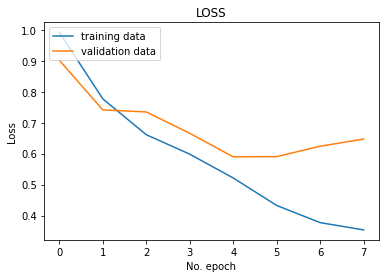

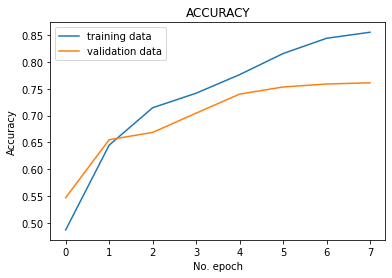

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1544
           1       0.76      0.80      0.78      1586
           2       0.63      0.65      0.64       844

    accuracy                           0.76      3974
   macro avg       0.74      0.74      0.74      3974
weighted avg       0.76      0.76      0.76      3974



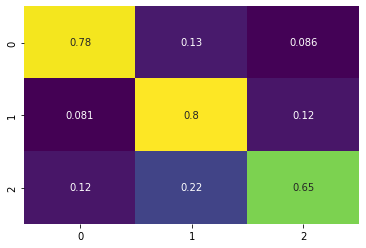

f1 score 0.7436508517613324


In [ ]:
# GRU
gru_model = gru()
#checkpoint_path="gru_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      #ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = gru_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(gru_model, y_test_true)
print("f1 score", f1)

Epoch 1/20
125/125 [==============================] - 8s 41ms/step - loss: 0.9279 - accuracy: 0.5378 - val_loss: 0.7878 - val_accuracy: 0.6361
Epoch 2/20
125/125 [==============================] - 3s 26ms/step - loss: 0.6316 - accuracy: 0.7232 - val_loss: 0.6031 - val_accuracy: 0.7451
Epoch 3/20
125/125 [==============================] - 3s 22ms/step - loss: 0.4837 - accuracy: 0.7988 - val_loss: 0.5666 - val_accuracy: 0.7519
Epoch 4/20
125/125 [==============================] - 3s 22ms/step - loss: 0.4229 - accuracy: 0.8310 - val_loss: 0.5896 - val_accuracy: 0.7491
Epoch 5/20
125/125 [==============================] - 3s 22ms/step - loss: 0.3771 - accuracy: 0.8504 - val_loss: 0.6046 - val_accuracy: 0.7604
Epoch 6/20
125/125 [==============================] - 3s 22ms/step - loss: 0.3534 - accuracy: 0.8589 - val_loss: 0.6332 - val_accuracy: 0.7557
Epoch 7/20
125/125 [==============================] - 3s 22ms/step - loss: 0.3209 - accuracy: 0.8747 - val_loss: 0.6866 - val_accuracy: 0.7504

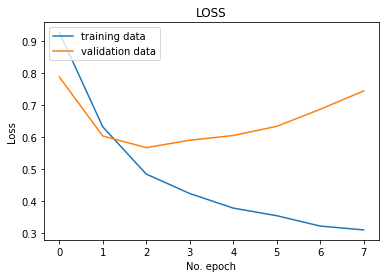

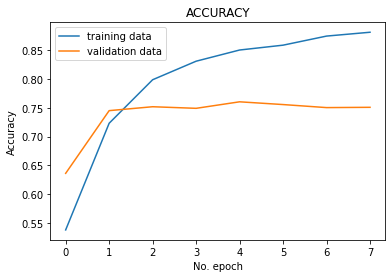

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1544
           1       0.76      0.79      0.77      1586
           2       0.61      0.63      0.62       844

    accuracy                           0.75      3974
   macro avg       0.73      0.73      0.73      3974
weighted avg       0.75      0.75      0.75      3974



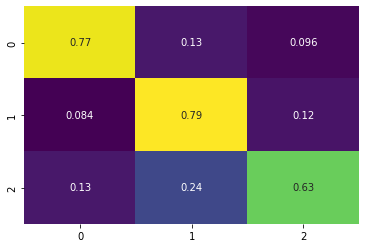

f1 score 0.7317203575788293


In [ ]:
# LSTM
lstm_model = lstm()
#checkpoint_path="lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.0001),
     # ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(lstm_model, y_test_true)
print("f1 score", f1)

Epoch 1/20
125/125 [==============================] - 14s 60ms/step - loss: 0.9227 - accuracy: 0.5400 - val_loss: 0.7533 - val_accuracy: 0.6683
Epoch 2/20
125/125 [==============================] - 6s 48ms/step - loss: 0.5879 - accuracy: 0.7482 - val_loss: 0.5813 - val_accuracy: 0.7504
Epoch 3/20
125/125 [==============================] - 6s 48ms/step - loss: 0.4566 - accuracy: 0.8144 - val_loss: 0.5464 - val_accuracy: 0.7594
Epoch 4/20
125/125 [==============================] - 6s 49ms/step - loss: 0.3991 - accuracy: 0.8392 - val_loss: 0.5611 - val_accuracy: 0.7599
Epoch 5/20
125/125 [==============================] - 6s 49ms/step - loss: 0.3550 - accuracy: 0.8587 - val_loss: 0.5935 - val_accuracy: 0.7698
Epoch 6/20
125/125 [==============================] - 6s 50ms/step - loss: 0.3292 - accuracy: 0.8701 - val_loss: 0.6062 - val_accuracy: 0.7625


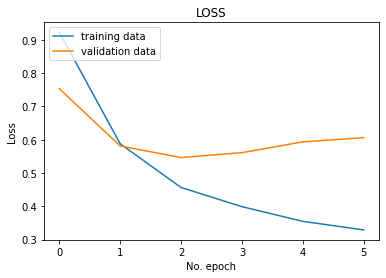

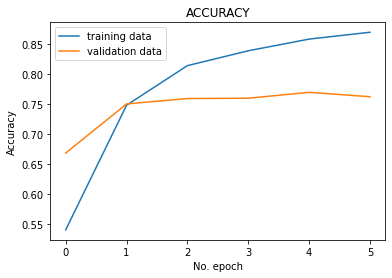

              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1544
           1       0.79      0.78      0.79      1586
           2       0.58      0.69      0.63       844

    accuracy                           0.76      3974
   macro avg       0.74      0.75      0.75      3974
weighted avg       0.77      0.76      0.77      3974



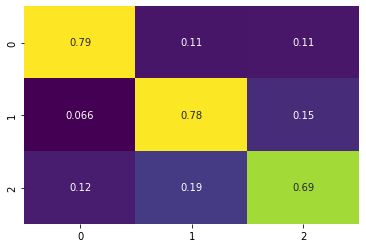

f1 score 0.7452775194920703


In [ ]:
# BI LSTM

bi_lstm_model = bi_lstm()
#checkpoint_path="bi_lstm_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
     # ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = bi_lstm_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(bi_lstm_model, y_test_true)
print("f1 score", f1)

Epoch 1/20
125/125 [==============================] - 9s 10ms/step - loss: 1.0085 - accuracy: 0.4745 - val_loss: 0.9300 - val_accuracy: 0.5382
Epoch 2/20
125/125 [==============================] - 1s 7ms/step - loss: 0.8141 - accuracy: 0.6299 - val_loss: 0.6439 - val_accuracy: 0.7144
Epoch 3/20
125/125 [==============================] - 1s 8ms/step - loss: 0.5403 - accuracy: 0.7700 - val_loss: 0.5553 - val_accuracy: 0.7557
Epoch 4/20
125/125 [==============================] - 1s 8ms/step - loss: 0.4406 - accuracy: 0.8203 - val_loss: 0.5403 - val_accuracy: 0.7657
Epoch 5/20
125/125 [==============================] - 1s 7ms/step - loss: 0.3838 - accuracy: 0.8477 - val_loss: 0.5500 - val_accuracy: 0.7708
Epoch 6/20
125/125 [==============================] - 1s 7ms/step - loss: 0.3418 - accuracy: 0.8703 - val_loss: 0.5748 - val_accuracy: 0.7620
Epoch 7/20
125/125 [==============================] - 1s 8ms/step - loss: 0.3014 - accuracy: 0.8867 - val_loss: 0.6057 - val_accuracy: 0.7675


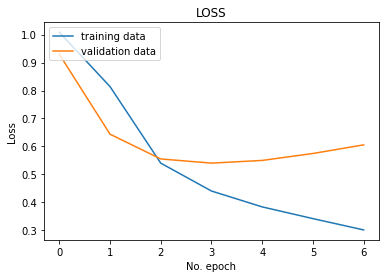

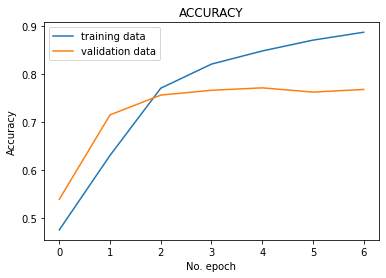

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1544
           1       0.79      0.78      0.79      1586
           2       0.61      0.67      0.64       844

    accuracy                           0.77      3974
   macro avg       0.75      0.75      0.75      3974
weighted avg       0.77      0.77      0.77      3974



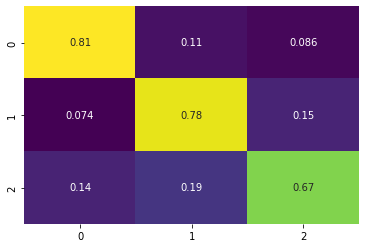

f1 score 0.7491136149890741


In [ ]:
conv_model = conv1d()
#checkpoint_path="conv_model.h5"
keras_callbacks   = [
      EarlyStopping(monitor='val_loss', patience=3, mode='min', min_delta=0.0001),
      #ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]
history = conv_model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)

plot_history(history)
f1 = evaluate_model(conv_model, y_test_true)
print("f1 score", f1)

In [ ]:
pip install tensorflow-addons

In [ ]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
import keras as k
from tensorflow_addons.layers import CRF

input = Input(shape=(25,))
word_embedding_size = 150
n_words = 5000
# Embedding Layer
model = Embedding(input_dim=n_words, output_dim=word_embedding_size, input_length=25)(input)

# BI-LSTM Layer
model = Bidirectional(LSTM(units=word_embedding_size, 
                           return_sequences=True, 
                           dropout=0.5, 
                           recurrent_dropout=0.5, 
                           kernel_initializer=k.initializers.he_normal()))(model)
model = LSTM(units=word_embedding_size * 2, 
             return_sequences=True, 
             dropout=0.5, 
             recurrent_dropout=0.5, 
             kernel_initializer=k.initializers.he_normal())(model)

# TimeDistributed Layer
model = TimeDistributed(Dense(3, activation="relu"))(model)  

# CRF Layer
crf = CRF(3)

out = crf(model)  # output
model = Model(input, out)

In [ ]:
# from keras.callbacks import ModelCheckpoint
# import matplotlib.pyplot as plt

# #Optimiser 
# adam = tf.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# # Compile model
# model.compile(optimizer=adam, loss=crf.loss_function, metrics=[crf.accuracy, 'accuracy'])

# model.summary()

# # Saving the best model only
# filepath="model-{val_accuracy:.2f}.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# callbacks_list = [checkpoint]

# # Fit the best model
# history = model.fit(x_train, np.array(y_train), batch_size=128, epochs=20, validation_split=0.1, verbose=1, callbacks=callbacks_list)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense

from crf import CRF

# num_labels = 10
# embedding_size = 100
# hidden_size = 128

# model = Sequential()
# model.add(Embedding(num_labels, embedding_size, mask_zero=True))
# model.add(Bidirectional(LSTM(hidden_size, return_sequences=True)))
# model.add(Dense(num_labels))

# crf = CRF(num_labels, sparse_target=True)
# model.add(crf)
# model.compile('adam', loss=crf.loss, metrics=[crf.accuracy])

In [ ]:
model = bi_lstm_crf()
history = model.fit(
    x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=keras_callbacks)